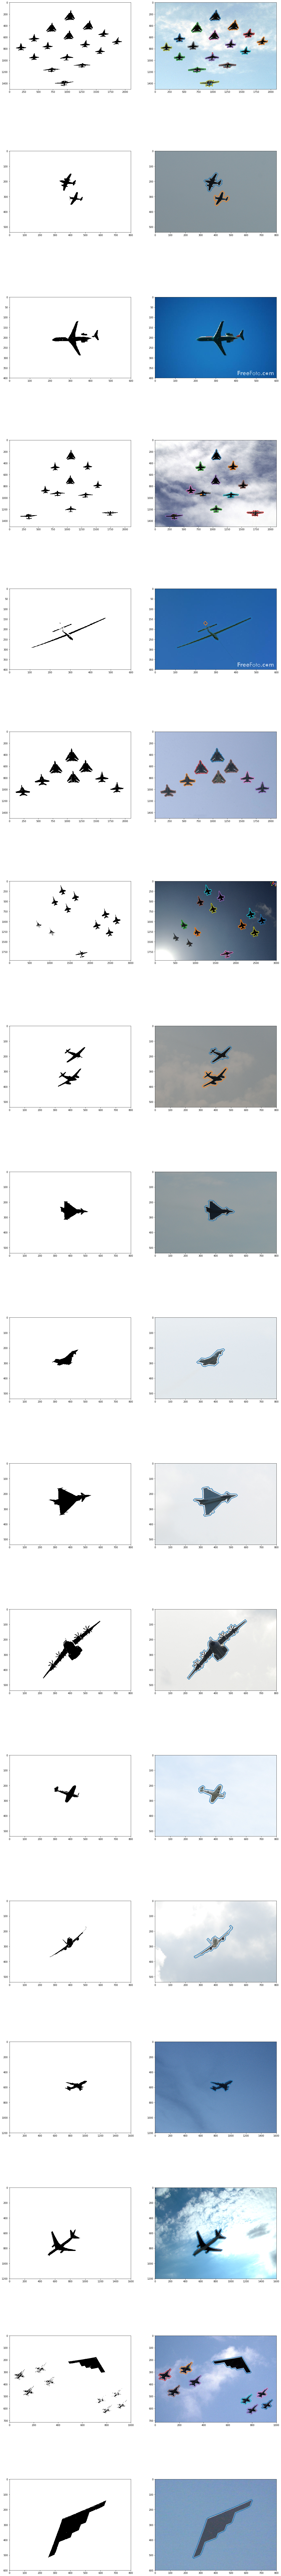

In [2]:
%matplotlib inline 
from __future__ import division
from pylab import *
import skimage as ski
from skimage import data, io, filters, exposure, measure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from matplotlib import pylab as plt
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures

"""
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)

dt = io.imread('s1.jpg')
im1 = ax1.imshow(dt)
dt = io.imread('s2.jpg')
fig.add_subplot(332)
#plt.show()

figure(figsize=(20,20))

subplot(6,3,1)
img = data.imread('s1.jpg')
io.imshow(img)
subplot(6,3,2)
img = data.imread('s2.jpg')
io.imshow(img)
subplot(6,3,3)
img = data.imread('s19.jpg')
io.imshow(img)
subplot(6,3,4)
img = data.imread('s4.jpg')
io.imshow(img)
subplot(6,3,5)
img = data.imread('s20.jpg')
io.imshow(img)
subplot(6,3,6)
img = data.imread('s6.jpg')
io.imshow(img)
subplot(6,3,7)
img = data.imread('s7.jpg')
io.imshow(img)
subplot(6,3,8)
img = data.imread('s8.jpg')
io.imshow(img)


subplot(6,3,10)
img = data.imread('s10.jpg')
io.imshow(img)
subplot(6,3,11)
img = data.imread('s11.jpg')
io.imshow(img)
subplot(6,3,12)
img = data.imread('s12.jpg')
io.imshow(img)
subplot(6,3,13)
img = data.imread('s13.jpg')
io.imshow(img)
subplot(6,3,14)
img = data.imread('s14.jpg')
io.imshow(img)
subplot(6,3,15)
img = data.imread('s15.jpg')
io.imshow(img)
subplot(6,3,16)
img = data.imread('s16.jpg')
io.imshow(img)
subplot(6,3,17)
img = data.imread('s16.jpg')
io.imshow(img)
subplot(6,3,18)
img = data.imread('s18.jpg')
io.imshow(img)


subplot(6,3,9)
img = data.imread('s9.jpg', flatten=True)
img = process(img)

for r in range(0,len(img)):
    for c in range(0,len(img[0])):
        if(img[r][c] > 0.5): img[r][c]=1
#img = (img.T[:, ::-1])  / 255.
#img = ski.filters.gaussian(img, 10, mode='nearest')
contours = ski.measure.find_contours(img, 0.7)

for n, contour in enumerate(contours):
        if(np.amax(contour[:,1])-np.amin(contour[:,1]) > 50):
            centroid = np.sum(contour, axis=0)/len(contour)
            xs,ys = ski.draw.polygon(contour[:, 1],contour[:, 0])
            for x in xs:
                for y in ys:
                    img[x][y] = 0


contour1 = contours[0]
x = []
y = []
for pair in contour1:
    x.append(pair[0])
    y.append(pair[1])
x,y = ski.draw.polygon(x,y)
for xs in x:
    for ys in y:
        img[xs,ys]=0

io.imshow(img)"""

warnings.simplefilter("ignore")
    
def gamma(img):
    g = np.mean(img) - 0.3
    return (img**g)

def contrast(img):
    percmin=0.3
    percmax=2.0
    MIN = np.percentile(img, percmin)
    MAX = np.percentile(img, 100-percmax)
    norm = (img - MIN) / (MAX - MIN)
    norm[norm[:,:] > 1] = 1
    norm[norm[:,:] < 0] = 0
    return norm

def threshold(img):
    thr = np.percentile(img, 4)
    std = np.std(img)
    if (std > 0.15): thr+=0.2
    else: thr-= 0.1
    if (std < 0.1): thr-=0.2
    return (img > thr)

def dilation(img):
    return mp.erosion(img)

fig, ax = plt.subplots(18, 2, figsize=(20,200))

for i in range(0,18):
    img_origin = data.imread('s' + str(i+1) + '.jpg', flatten=False)
    img = data.imread('s' + str(i+1) + '.jpg', flatten=True)
    img = gamma(img)
    img = gamma(img)
    img = contrast(img)
    img = threshold(img)
    
    ax[i][0].imshow(img, cmap='gray')
    
    for j in range(0, 7):
        img = dilation(img)
    
    ax[i][1].imshow(img_origin)
    
    contours = measure.find_contours(img, 0.7)

    for n, contour in enumerate(contours):
        #np.amax(contour[:,1])-np.amin(contour[:,1]) > 50
        if(1):
            centroid = np.sum(contour, axis=0)/len(contour)
            ax[i][1].plot(contour[:, 1], contour[:, 0], linewidth=2)
            #ax[i].plot(centroid[1], centroid[0], marker='o', markersize=5, color="white")